In [34]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv

In [2]:
from tensorflow.keras import datasets

In [3]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
NUM_CLASSES = 10

In [20]:
cifar10_class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Training Images

Text(0.5, 1.0, 'automobile')

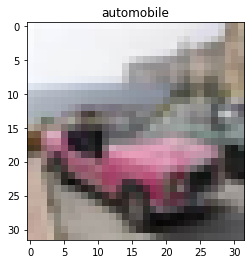

In [27]:
index_train = int(np.random.random() * x_train.shape[0])
plt.imshow(x_train[index_train])
plt.title(cifar10_class_names[int(y_train[index_train])])

Testing Images

Text(0.5, 1.0, 'horse')

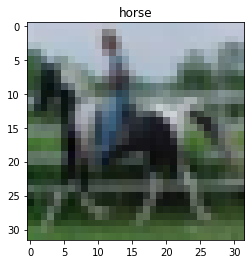

In [33]:
index_test = int(np.random.random() * x_test.shape[0])
plt.imshow(x_test[index_test])
plt.title(cifar10_class_names[int(y_test[index_test])])

In [35]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

Text(0.5, 1.0, 'cat')

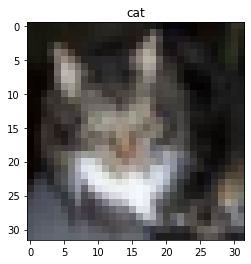

In [38]:
index_test = int(np.random.random() * x_test.shape[0])
plt.imshow(x_test[index_test])
plt.title(cifar10_class_names[int(y_test[index_test])])

In [43]:
x_train = x_train.reshape(x_train.shape[0], -1)

In [44]:
x_test = x_test.reshape(x_test.shape[0], -1)

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

In [46]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

c:\Users\user\anaconda3\envs\mlenv-310\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [48]:
report = classification_report(y_test, knn.predict(x_test),digits=4)

In [49]:
print(report)

              precision    recall  f1-score   support

           0     0.3830    0.5370    0.4471      1000
           1     0.6467    0.2050    0.3113      1000
           2     0.2253    0.4520    0.3007      1000
           3     0.2940    0.2170    0.2497      1000
           4     0.2441    0.5140    0.3310      1000
           5     0.3922    0.2200    0.2819      1000
           6     0.3464    0.2480    0.2890      1000
           7     0.6774    0.2100    0.3206      1000
           8     0.3987    0.6550    0.4956      1000
           9     0.6965    0.1400    0.2331      1000

    accuracy                         0.3398     10000
   macro avg     0.4304    0.3398    0.3260     10000
weighted avg     0.4304    0.3398    0.3260     10000



In [50]:
from sklearn.metrics import confusion_matrix

In [51]:
cm = confusion_matrix(y_test, knn.predict(x_test))

In [52]:
import seaborn as sns

Text(0.9, 0.85, '[17, 22]')

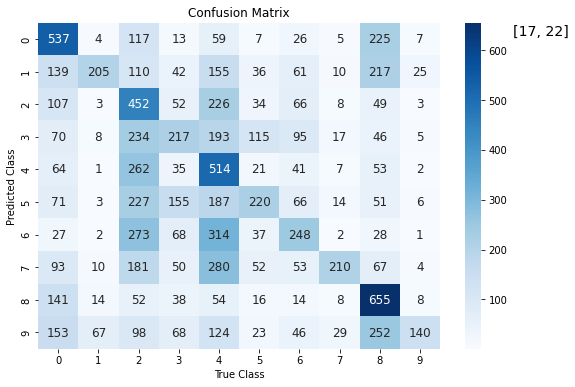

In [53]:
plt.figure(figsize=(9, 6))
plt.title('Confusion Matrix')
sns.heatmap(cm, annot=True, fmt="", cmap='Blues',annot_kws={"fontsize": 12})
plt.xlabel('True Class')
plt.ylabel('Predicted Class')
plt.title("Confusion Matrix")
plt.figtext(0.9,0.85,'[17, 22]',ha='center',fontsize=14)

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
parameters = dict(n_neighbors = range(1,20))
knn_clf = KNeighborsClassifier()
gscv = GridSearchCV(knn_clf, param_grid=parameters, scoring="accuracy", cv=5)
gscv.fit(x_train, y_train)

c:\Users\user\anaconda3\envs\mlenv-310\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\user\anaconda3\envs\mlenv-310\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\user\anaconda3\envs\mlenv-310\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\user\anaconda3\envs\mlenv-310\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d ar

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 20)}, scoring='accuracy')

In [57]:
print(gscv.best_params_)

{'n_neighbors': 1}


In [61]:
results = gscv.cv_results_

In [62]:
results

{'mean_fit_time': array([0.23191586, 0.21427059, 0.25930519, 0.27360067, 0.24829378,
        0.24069061, 0.28499136, 0.2562901 , 0.25417891, 0.27277942,
        0.24919596, 0.24778547, 0.24562321, 0.24813466, 0.24720759,
        0.24461679, 0.24792652, 0.24224234, 0.24361272]),
 'std_fit_time': array([0.02501066, 0.00324635, 0.02438766, 0.02464285, 0.01128475,
        0.00552634, 0.05230653, 0.01469474, 0.01127625, 0.04184239,
        0.01488589, 0.0060201 , 0.01059017, 0.00764529, 0.00662636,
        0.00767435, 0.00930193, 0.0064205 , 0.00358769]),
 'mean_score_time': array([22.35784192, 23.34919763, 28.67344232, 29.59510212, 26.17779961,
        25.7785018 , 28.80341587, 26.34445724, 27.85078473, 26.60173779,
        26.13197145, 25.80905719, 26.55623832, 26.0941576 , 25.91926451,
        25.83307419, 26.10204597, 25.82730227, 25.85151553]),
 'std_score_time': array([2.10343837, 1.65751671, 3.77214687, 2.66332447, 0.96190042,
        0.22564812, 1.22648902, 0.23374576, 2.61711223, 0

In [63]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)

c:\Users\user\anaconda3\envs\mlenv-310\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=1)

In [64]:
report = classification_report(y_test, knn.predict(x_test),digits=4)

In [65]:
print(report)

              precision    recall  f1-score   support

           0     0.4240    0.4850    0.4524      1000
           1     0.6488    0.2180    0.3263      1000
           2     0.2424    0.3840    0.2972      1000
           3     0.2916    0.2400    0.2633      1000
           4     0.2492    0.4570    0.3225      1000
           5     0.3634    0.2900    0.3226      1000
           6     0.3284    0.3530    0.3402      1000
           7     0.5589    0.2940    0.3853      1000
           8     0.3988    0.6190    0.4851      1000
           9     0.6067    0.1990    0.2997      1000

    accuracy                         0.3539     10000
   macro avg     0.4112    0.3539    0.3495     10000
weighted avg     0.4112    0.3539    0.3495     10000

